# 모형 진단

- 모형의 질에 대한 평가 방법
- 잔차분석, ANOVA, 왈드 검정, 드롭인 이탈도 분석, AIC, BIC, 교차 타당성 오류, 붓스트랩 방법

## 1. 잔차(Residual)

In [2]:
housing <- read.table("https://www.jaredlander.com/data/housing.csv",
                     sep = "," , header = TRUE,
                     stringsAsFactors = FALSE)

In [3]:
names(housing) <- c("Neighborhood", "Class", "Units", "YearBuilt",
                   "SqFt", "Income", "IncomePerSqFt", "Expense",
                   "ExpensePerSqFt", "NetIncome", "Value",
                   "ValuePerSqFt", "Boro")

- 이상점(Outlier) 제거

In [4]:
housing <- housing[housing$Unit < 1000,]
head(housing)

Neighborhood,Class,Units,YearBuilt,SqFt,Income,IncomePerSqFt,Expense,ExpensePerSqFt,NetIncome,Value,ValuePerSqFt,Boro
FINANCIAL,R9-CONDOMINIUM,42,1920,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
FINANCIAL,R4-CONDOMINIUM,78,1985,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
FINANCIAL,RR-CONDOMINIUM,500,NA,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
FINANCIAL,R4-CONDOMINIUM,282,1930,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
TRIBECA,R4-CONDOMINIUM,239,1985,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
TRIBECA,R4-CONDOMINIUM,133,1986,139719,5127687,36.70,1497788,10.72,3629899,26737996,191.37,Manhattan


- 모형 적합

In [5]:
house1 <- lm(ValuePerSqFt ~ Units + SqFt + Boro, data=housing)
summary(house1)


Call:
lm(formula = ValuePerSqFt ~ Units + SqFt + Boro, data = housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-168.458  -22.680    1.493   26.290  261.761 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.430e+01  5.342e+00   8.293  < 2e-16 ***
Units             -1.532e-01  2.421e-02  -6.330 2.88e-10 ***
SqFt               2.070e-04  2.129e-05   9.723  < 2e-16 ***
BoroBrooklyn       3.258e+01  5.561e+00   5.858 5.28e-09 ***
BoroManhattan      1.274e+02  5.459e+00  23.343  < 2e-16 ***
BoroQueens         3.011e+01  5.711e+00   5.272 1.46e-07 ***
BoroStaten Island -7.114e+00  1.001e+01  -0.711    0.477    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.2 on 2613 degrees of freedom
Multiple R-squared:  0.6034,	Adjusted R-squared:  0.6025 
F-statistic: 662.6 on 6 and 2613 DF,  p-value: < 2.2e-16


Loading required package: ggplot2
Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

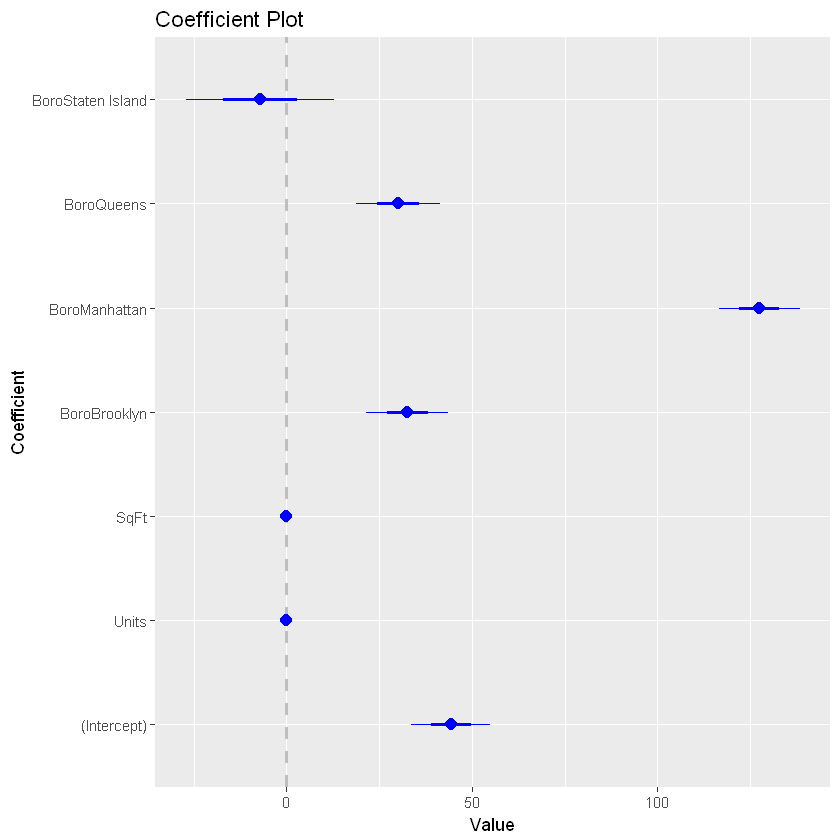

In [6]:
library(coefplot)
coefplot(house1)

- 선형 회귀에서 잔차에 기초한 진단 그래프로 3개 정도가 중요하다
    - 적합값과 잔차를 대응한 그래프
    - Q-Q(분위수-분위수) 그림
    - 잔차에 대한 히스토 그램

In [7]:
library(ggplot2)

In [8]:
head(fortify(house1))

ValuePerSqFt,Units,SqFt,Boro,.hat,.sigma,.cooksd,.fitted,.resid,.stdresid
200.00,42,36500,Manhattan,0.0009594821,43.20952,5.424169e-05,172.8475,27.15248,0.6287655
242.76,78,126420,Manhattan,0.0009232393,43.19848,2.285253e-04,185.9418,56.81815,1.3157048
164.15,500,554174,Manhattan,0.0089836758,43.20347,1.459368e-03,209.8077,-45.65775,-1.0615607
271.23,282,249076,Manhattan,0.0035168641,43.17583,2.252653e-03,180.0672,91.16278,2.1137487
247.48,239,219495,Manhattan,0.0023865978,43.19289,8.225193e-04,180.5341,66.94589,1.5513636
191.37,133,139719,Manhattan,0.0008934957,43.21225,8.446170e-06,180.2661,11.10385,0.2571216


In [9]:
h1 <- ggplot(aes(x=.fitted, y=.resid), data=house1)+
geom_point()+
geom_hline(yintercept = 0)+
geom_smooth(se=FALSE)+
labs(x="Fitted Values", y="Residuals")

- 적합값과 잔차 대응 그래프

`geom_smooth()` using method = 'gam'


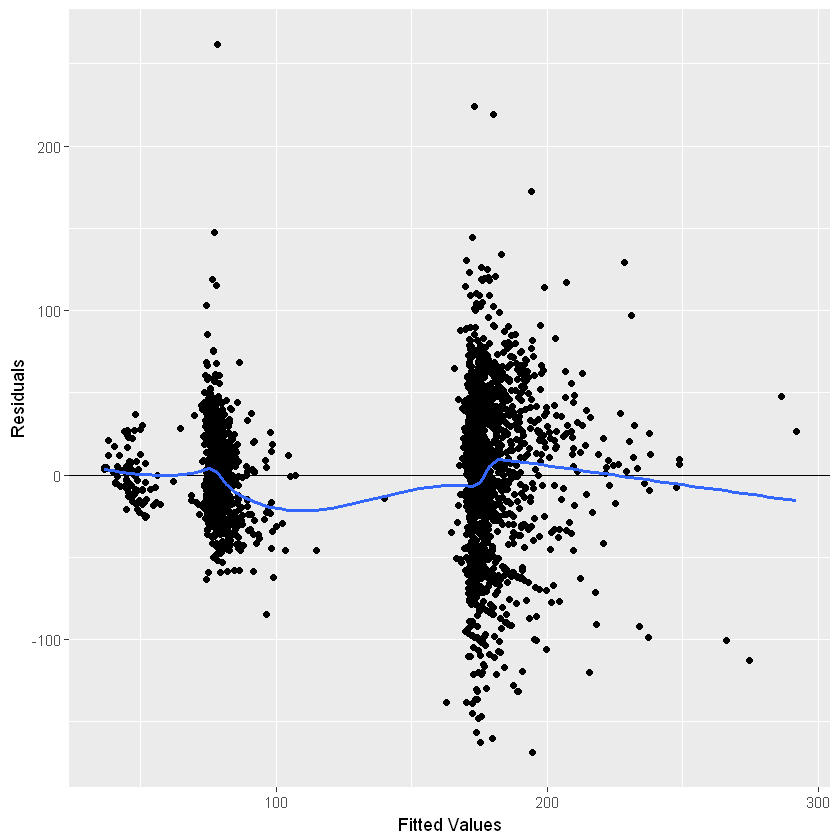

In [10]:
h1

- Boro 변수에 대한 효과 분리

`geom_smooth()` using method = 'gam'


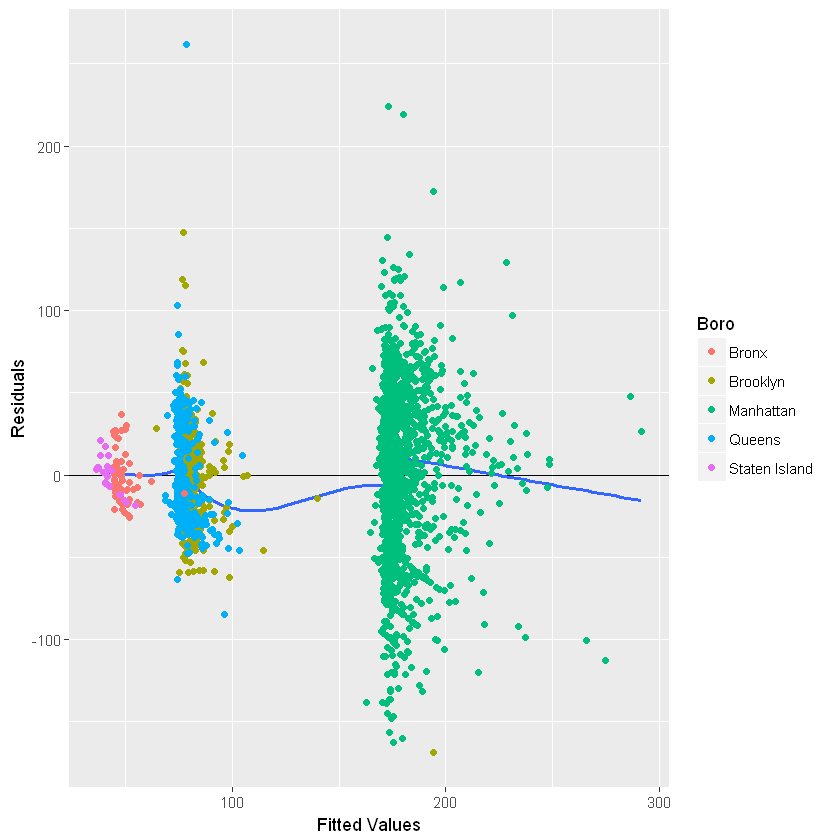

In [11]:
h1 + geom_point(aes(color=Boro))

- Q-Q 그림

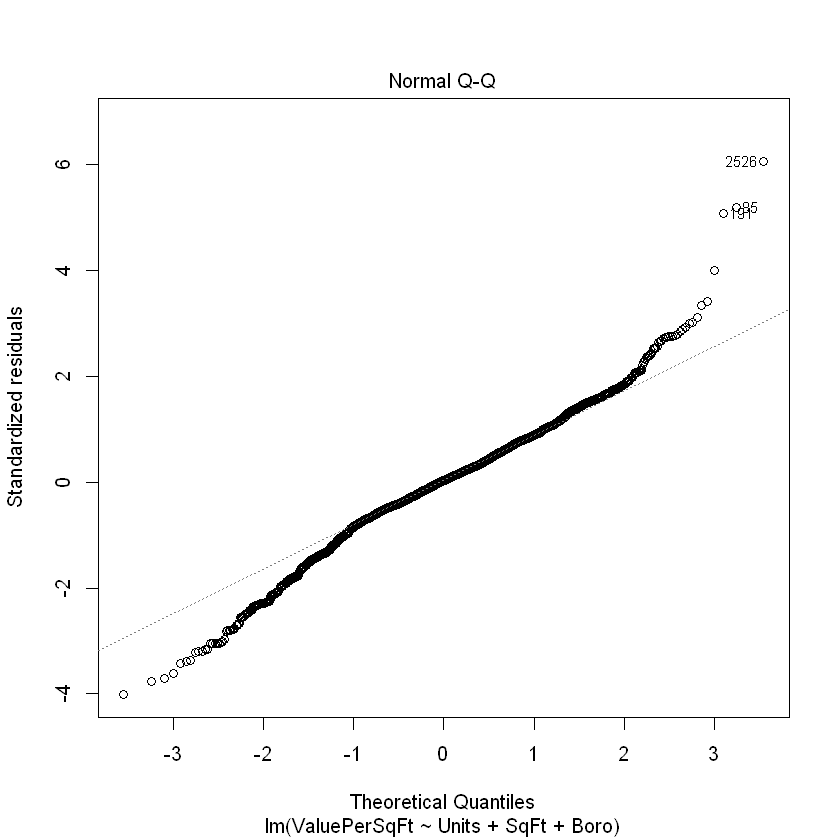

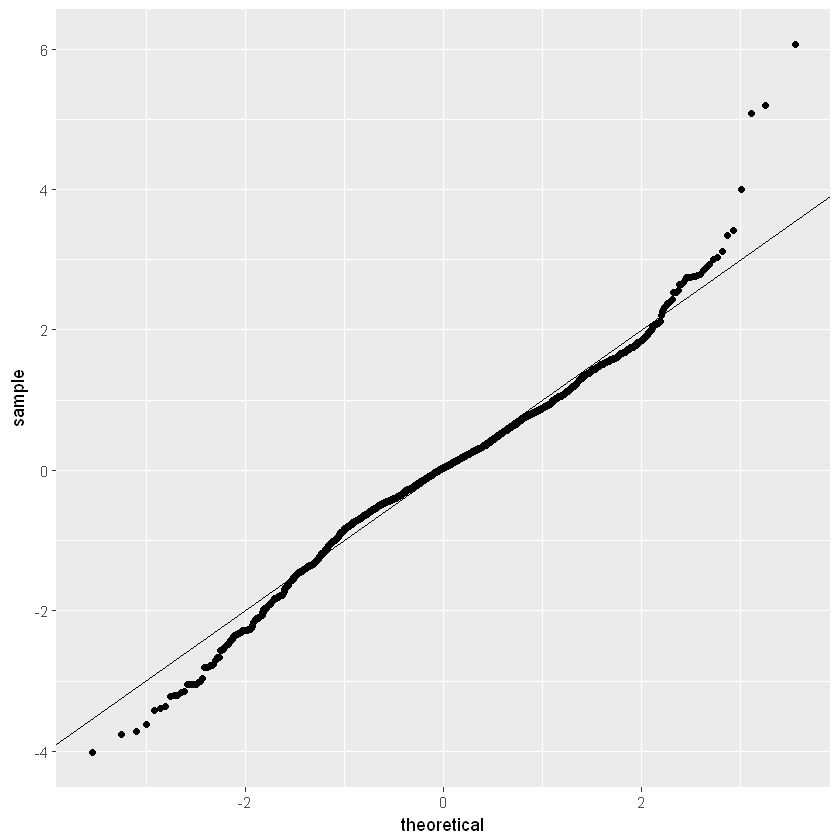

In [12]:
plot(house1, which = 2)
ggplot(house1, aes(sample = .stdresid)) + stat_qq() + geom_abline()

- 잔차에 대한 히스토 그램

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


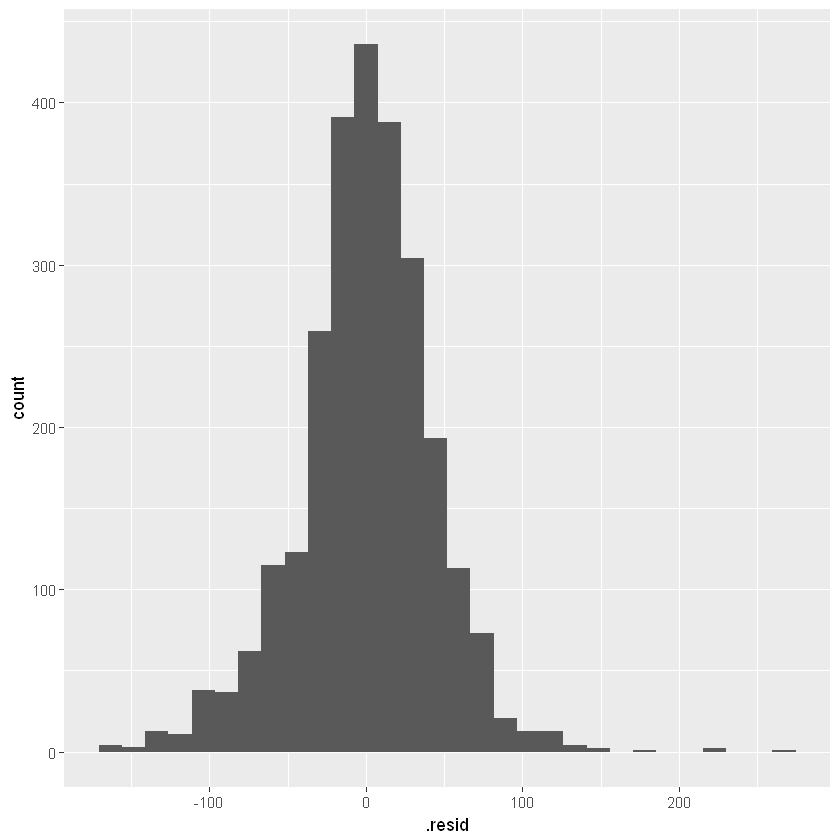

In [13]:
ggplot(house1, aes(x=.resid)) + geom_histogram()

## 2. 여러 모형에 대한 비교

In [14]:
house2 <- lm(ValuePerSqFt ~ Units * SqFt + Boro, data=housing)
house3 <- lm(ValuePerSqFt ~ Units + SqFt * Boro + Class, data=housing)
house4 <- lm(ValuePerSqFt ~ Units + SqFt * Boro + SqFt*Class, data=housing)
house5 <- lm(ValuePerSqFt ~ Boro + Class , data=housing)

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

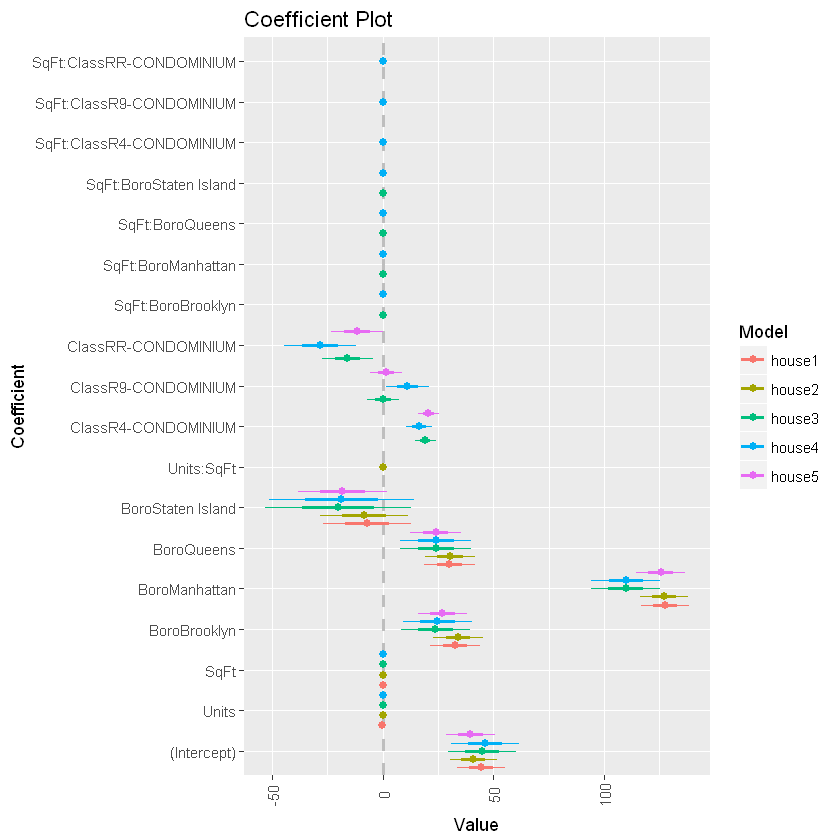

In [15]:
multiplot(house1, house2, house3, house4, house5, pointSize=2)

In [16]:
anova(house1, house2, house3, house4, house5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2613,4877506,NA,NA,NA,NA
2612,4847886,1,29620.08,17.035965,3.783142e-05
2606,4576769,6,271117.35,25.988817,3.625943e-30
2603,4525783,3,50986.11,9.774872,2.066324e-06
2612,4895630,-9,-369847.43,23.635269,3.350594e-39


In [17]:
AIC(house1, house2, house3, house4, house5)

,df,AIC
house1,8,27177.78
house2,9,27163.82
house3,15,27025.04
house4,18,27001.69
house5,9,27189.50


In [19]:
BIC(house1, house2, house3, house4, house5)

,df,BIC
house1,8,27224.75
house2,9,27216.66
house3,15,27113.11
house4,18,27107.37
house5,9,27242.34


- 모형의 이탈도(Deviance)
    - 모형에 하나의 변수가 추가될 때마다 이탈도는 2만큼 감소한다.
    - 카테고리형 변수에서는 하나의 레벨이 추가될 때마다 이탈도가 2만큼 감소한다.

In [20]:
# ValuePerSqFt 변수에서 150을 기준으로 이진 변수를 만든다.
housing$HighValues <- housing$ValuePerSqFt >= 150

In [24]:
# 몇 가지 모형을 생성한다

high1 <- glm(HighValues ~ Units + SqFt + Boro,
            data = housing, family = binomial(link='logit'))
high2 <- glm(HighValues ~ Units * SqFt + Boro ,
            data = housing, family = binomial(link='logit'))
high3 <- glm(HighValues ~ Units + SqFt * Boro + Class,
            data = housing, family = binomial(link='logit'))
high4 <- glm(HighValues ~ Units * SqFt * Boro + SqFt * Class,
            data = housing, family = binomial(link='logit'))
high5 <- glm(HighValues ~ Boro + Class,
            data = housing, family = binomial(link='logit'))

In [25]:
anova(high1, high2, high3, high4, high5)
AIC(high1, high2, high3, high4, high5)
BIC(high1, high2, high3, high4, high5)

Resid. Df,Resid. Dev,Df,Deviance
2613,1687.484,NA,NA
2612,1678.835,1,8.648311
2606,1627.504,6,51.330917
2594,1591.726,12,35.778202
2612,1662.290,-18,-70.563589


,df,AIC
high1,7,1701.484
high2,8,1694.835
high3,14,1655.504
high4,26,1643.726
high5,8,1678.290


,df,BIC
high1,7,1742.580
high2,8,1741.803
high3,14,1737.697
high4,26,1796.370
high5,8,1725.257


## 3. 교차 타당성 검증(Cross Validation)

- ANOVA, AIC 등과 같은 모형 검정 방법은 현대에는 약간 구식 방법으로 여겨지고 있다.
- k-폴드 교차 타당성 검증이라고 불리는 교차 검증을 모형의 질 판단을 위해 사용한다.

In [26]:
install.packages("boot")

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\Rtmpe0ntkS\downloaded_packages


In [27]:
library(boot)

In [28]:
houseG1 <- glm(ValuePerSqFt ~ Units + SqFt + Boro,
              data =housing, family =gaussian(link="identity"))

In [30]:
identical(coef(house1), coef(houseG1))

[1] TRUE

- 5겹 교차 타당성 검증 실행

In [36]:
houseCV1 <- cv.glm(housing, houseG1, K=5)

- 첫번째 값은 모든 폴드에 대해 비용 함수에 기반을 둔 원래의 교차타당도 오차
- 두번째 값은 K 폴드가 아닌 하나의 데이터 포인트를 기준으로 교차타당도를 측정

In [37]:
# 에러 체크
houseCV1$delta

[1] 1872.763 1871.522

In [33]:
# glm으로 모형 적합을 다시 시행

houseG2 <- glm(ValuePerSqFt ~ Units * SqFt + Boro, data = housing)
houseG3 <- glm(ValuePerSqFt ~ Units + SqFt * Boro + Class, data = housing)
houseG4 <- glm(ValuePerSqFt ~ Units + SqFt * Boro + SqFt * Class , data = housing)
houseG5 <- glm(ValuePerSqFt ~ Boro + Class, data = housing)

In [34]:
# 교차 타당도 계산
houseCV2 <- cv.glm(housing, houseG2, K=5)
houseCV3 <- cv.glm(housing, houseG3, K=5)
houseCV4 <- cv.glm(housing, houseG4, K=5)
houseCV5 <- cv.glm(housing, houseG5, K=5)

In [38]:
# 오차 확인
cvResults <- as.data.frame(rbind(houseCV1$delta, houseCV2$delta,
                                houseCV3$delta, houseCV4$delta,
                                houseCV5$delta))

In [39]:
names(cvResults) <- c("Error", "Adjusted.Error")

In [40]:
cvResults$Model <- sprintf("houseG%s", 1:5)

In [41]:
cvResults

Error,Adjusted.Error,Model
1872.763,1871.522,houseG1
1865.768,1864.029,houseG2
1769.512,1766.936,houseG3
1752.090,1749.262,houseG4
1877.338,1876.359,houseG5
